In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sea


        + So far we have done 
                = Coategorical colum analysis 
                    1. frequency table
                    2. relative frequency table 
                    3. bar chart 
                    4. pie chart 
                = Numerical column analysis 
                    1. histogram
                    2. emperical rule 
                    3. metrics 
                    4. outliers 
                = Bi - varient and Multivarient Coulumns analysis 
                    - two or more colmums analysis 

In [5]:
visa = pd.read_csv(r"C:\Users\prath\FullStackDataScience\my own folder\database\data_files\Visadataset.csv")
visa.head(2)

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified


visa["continent"].value

In [19]:
Certified = visa[(visa["continent"] == "Asia") & (visa["case_status"] == "Certified")]

In [ ]:
Denial = visa[(visa["continent"] == "Asia") & (visa["case_status"] == "Denied")]

In [25]:
pd.DataFrame([Certified.shape[0], Denial.shape[0]], columns=["Asia"], index = ["Certified", "Denied"]).T

,Certified,Denied
Asia,11012,5849


In [28]:
data = []
index = visa["continent"].unique().tolist()
for i in  index:
    Certified = visa[(visa["continent"] == i) & (visa["case_status"] == "Certified")]
    Denial = visa[(visa["continent"] == i) & (visa["case_status"] == "Denied")]
    
    data.append([Certified.shape[0], Denial.shape[0]])

pd.DataFrame(data, index=index, columns=["Certified", "Denied"])



,Certified,Denied
Asia,11012,5849
Africa,397,154
North America,2037,1255
Europe,2957,775
South America,493,359
Oceania,122,70


## pd.crosstab

In [32]:
col1 = visa["continent"]
col2 = visa["case_status"]

pd.crosstab(col1, col2)

case_status,Certified,Denied
continent,,
Africa,397,154
Asia,11012,5849
Europe,2957,775
North America,2037,1255
Oceania,122,70
South America,493,359


<Axes: xlabel='continent'>

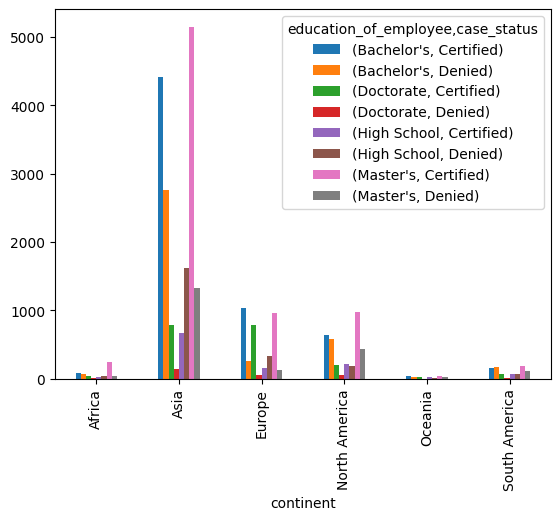

In [47]:
### lets find out 

col1 = visa["continent"]
col2 = visa["education_of_employee"]
col3 = visa["case_status"]

pd.crosstab(col1, [col2, col3]).plot(kind = "bar")

<Axes: xlabel='education_of_employee'>

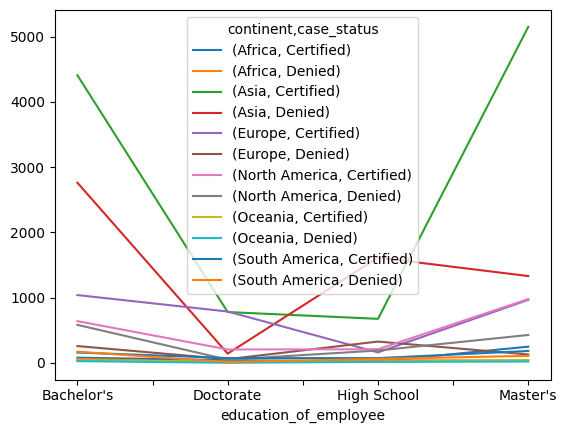

In [43]:
### lets find out 

col1 = visa["continent"]
col2 = visa["education_of_employee"]
col3 = visa["case_status"]

pd.crosstab(col2, [col1, col3]).plot()

In [50]:
visa.groupby(by = "continent")["prevailing_wage"].mean()


continent
Africa           77425.923450
Asia             79543.021780
Europe           59842.925899
North America    68066.319257
Oceania          75994.276719
South America    60209.575314
Name: prevailing_wage, dtype: float64